In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import make_blobs

In [6]:
X, y = make_blobs(n_samples= 1000, centers=3, random_state=42)

In [7]:
X

array([[-6.59633932, -7.13901457],
       [-6.13753182, -6.58081701],
       [ 5.19820575,  2.04917508],
       ...,
       [ 3.69047995,  4.60555175],
       [ 4.03036663,  1.78619838],
       [-7.44179522, -7.08933147]])

In [8]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


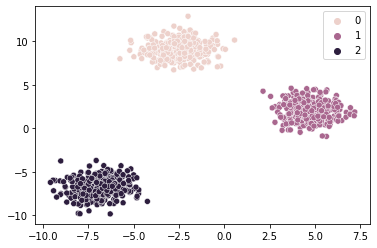

In [9]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


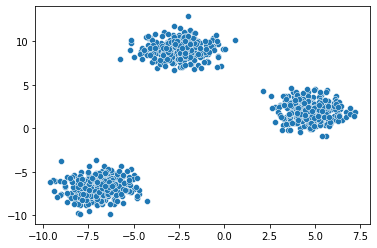

In [10]:
sns.scatterplot(X[:, 0], X[:, 1])

In [11]:
# KMeans - We want to minimize the loss-> Here loss is the distance between the points and the cluster centers
from sklearn.cluster import KMeans


In [12]:
model = KMeans(n_clusters=3)


In [13]:
model.fit(X)

KMeans(n_clusters=3)

In [14]:
y_gen=model.labels_

In [15]:
model.cluster_centers_

array([[ 4.7286341 ,  2.05557266],
       [-2.52414179,  9.00394283],
       [-6.86656253, -6.78519427]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


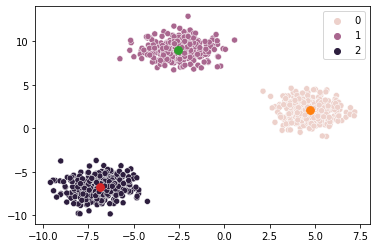

In [16]:
sns.scatterplot(X[:,0], X[:, 1], hue=y_gen)
for centers in model.cluster_centers_:
  plt.scatter(centers[0], centers[1], s=60)

In [ ]:
import random

# Custom KMeans


In [ ]:
class Clusters():
  def __init__(self, centers):
    self.centers = centers
    self.points = []

  def distance(self, point):
    return np.sqrt(np.sum((point - self.centers)**2))

class CustomKMeans():

  def __init__(self, n_clusters=3, max_iters = 10):
    self.n_clusters = n_clusters
    self.max_iters = max_iters

  def fit(self, X):
    clusters = []
    for i in range(self.n_clusters):
      cluster = Clusters(centers = random.choice(X))
      clusters.append(cluster)

    
    for i in range(self.max_iters):
      labels = []
    # going to each point
      for point in X:
        distances = []
        # Collecting distances from every cluster
        for cluster in clusters:
          distances.append(cluster.distance(point))

        # finding closest cluster
        closest_idx = np.argmin(distances)
        closest_cluster = clusters[closest_idx]
        closest_cluster.points.append(point)
        labels.append(closest_idx)

      for cluster in clusters:
        cluster.centers = np.mean(cluster.points, axis=0)

    self.labels = labels
    self.cluster_centers_ = [cluster.centers for cluster in clusters]\


In [ ]:
model = CustomKMeans(n_clusters=3, max_iters=300)
model.fit(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


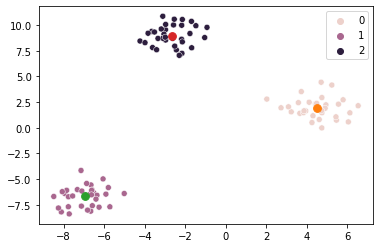

In [ ]:
sns.scatterplot(X[:,0], X[:, 1], hue=model.labels)
for centers in model.cluster_centers_:
  plt.scatter(centers[0], centers[1], s=60)